<a href="https://colab.research.google.com/github/briankemei/Projects/blob/main/WNBA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set focus to on analysis of WNBA team.

 My team concentration would be in Dallas Wings.

**Importing python libraries**

pandas(data visualization), numpy( mathematical operations), matplotlib(visualizations), ipywidgets(interactive matplotlib plots)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML

Downloading the dataset and reading it.

Downloaded the data from the drop box using the url link

Extracted and read the data as an excel file.

Print few lines of the datset

In [2]:
!wget -O  wnba_team_box_score_22_23.xlsx https://www.dropbox.com/scl/fi/wgz5ns7ormtwzgmzfqfmr/wnba_team_box_score_22.xlsx?rlkey=wocgxla2861qlg9zb561jetec&dl=0
#!wget -0 - wnba_team_box_score_22_23.csv
wnba_standings_df = pd.read_excel('wnba_team_box_score_22_23.xlsx')
wnba_standings_df.head()

--2025-09-30 01:12:20--  https://www.dropbox.com/scl/fi/wgz5ns7ormtwzgmzfqfmr/wnba_team_box_score_22.xlsx?rlkey=wocgxla2861qlg9zb561jetec
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6033:18::a27d:5312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd2c0588d2a9dfc0dffb2429a2e.dl.dropboxusercontent.com/cd/0/inline/CyQe7dF70uStbwJyRa2tf7l8v3x9wejk3GR01xx8wgJKcCeLF2zBJuITfwmsw3Gjz1hi60XtwajVZJZamZ7nVr_t_W3qp5c_s1PXTSzx3Ze7NmM7tdn8mWkHSqyooqk_LoA/file# [following]
--2025-09-30 01:12:20--  https://ucd2c0588d2a9dfc0dffb2429a2e.dl.dropboxusercontent.com/cd/0/inline/CyQe7dF70uStbwJyRa2tf7l8v3x9wejk3GR01xx8wgJKcCeLF2zBJuITfwmsw3Gjz1hi60XtwajVZJZamZ7nVr_t_W3qp5c_s1PXTSzx3Ze7NmM7tdn8mWkHSqyooqk_LoA/file
Resolving ucd2c0588d2a9dfc0dffb2429a2e.dl.dropboxusercontent.com (ucd2c0588d2a9dfc0dffb2429a2e.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6018:15::a27d:30f
Conne

,GAME_CODE,GAME_TYPE_ID,GAME_TYPE_DESC,ARENA_ID,ARENA_NAME,HOME_TEAM_ID,AWAY_TEAM_ID,HOME_SCORE,AWAY_SCORE,SEASON,...,POINTS,TOTAL_REBOUNDS,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,OUTCOME
0,2429488,1,Regular Season,2116,Climate Pledge Arena,161,157,86,93,2022,...,86,26,7,19,29,7,4,14,21,L
1,2429488,1,Regular Season,2116,Climate Pledge Arena,161,157,86,93,2022,...,93,36,6,30,28,11,2,14,19,W
2,2429481,1,Regular Season,7186,Indiana Farmers Coliseum,158,5691,89,87,2022,...,89,39,9,30,19,7,6,15,18,W
3,2429540,1,Regular Season,10615,Barclays Center,150,156,88,69,2022,...,88,35,9,26,21,5,5,13,14,W
4,2429485,1,Regular Season,2116,Climate Pledge Arena,161,150,92,61,2022,...,92,40,9,31,24,13,3,11,15,W


Data columns

In [3]:
wnba_standings_df.columns

Index(['GAME_CODE', 'GAME_TYPE_ID', 'GAME_TYPE_DESC', 'ARENA_ID', 'ARENA_NAME',
       'HOME_TEAM_ID', 'AWAY_TEAM_ID', 'HOME_SCORE', 'AWAY_SCORE', 'SEASON',
       'TEAM_ID', 'TEAM', 'OPP_TEAM_ID', 'OPP', 'GD', 'FIELD_GOALS_MADE',
       'FIELD_GOALS_ATT', 'THREE_POINT_MADE', 'THREE_POINT_ATT',
       'FREE_THROWS_MADE', 'FREE_THROWS_ATT', 'POINTS', 'TOTAL_REBOUNDS',
       'OFFENSIVE_REBOUNDS', 'DEFENSIVE_REBOUNDS', 'ASSISTS', 'STEALS',
       'BLOCKS', 'TURNOVERS', 'PERSONAL_FOULS', 'OUTCOME'],
      dtype='object')

Name of teams in the league sorted, with the team ID included

In [4]:
team_names=  wnba_standings_df[['TEAM','TEAM_ID']].drop_duplicates().reset_index(drop=True)
print(team_names)

                  TEAM  TEAM_ID
0        Seattle Storm      161
1      Connecticut Sun      157
2        Indiana Fever      158
3     New York Liberty      150
4          Chicago Sky     5691
5       Minnesota Lynx      156
6   Washington Mystics      154
7      Phoenix Mercury      151
8   Los Angeles Sparks      149
9        Atlanta Dream     8406
10      Las Vegas Aces      153
11        Dallas Wings      155


Finding the maximum, minimum, average score home and away

In [5]:
dallas_wings_agg = wnba_standings_df[wnba_standings_df['TEAM']=='Dallas Wings'].groupby('TEAM')[['HOME_SCORE','AWAY_SCORE']].agg(['max','min','mean'])
print(dallas_wings_agg)

             HOME_SCORE           AWAY_SCORE               
                    max min  mean        max min       mean
TEAM                                                       
Dallas Wings         99  51  82.5        116  64  83.194444


Distribution histogram to show Dallas wings score home and away.


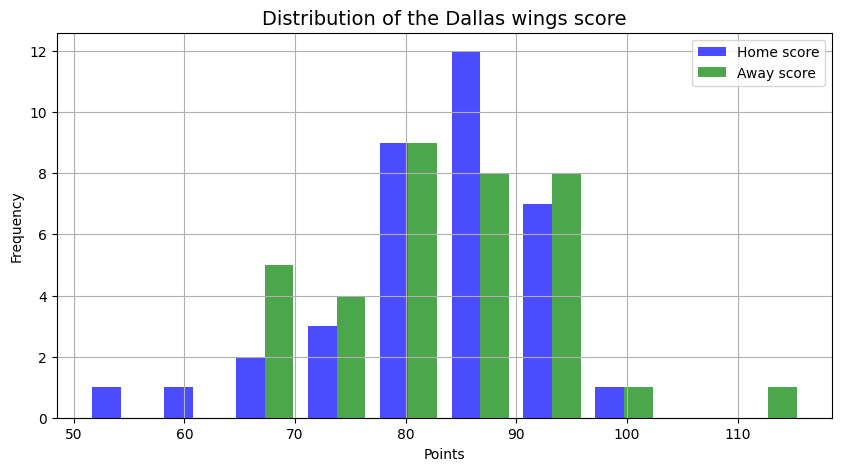

In [6]:
dallas_wings_scores= wnba_standings_df[wnba_standings_df['TEAM']=='Dallas Wings'][['HOME_SCORE','AWAY_SCORE']]

#plotting histogram of away and home score
plt.figure(figsize=(10,5))
plt.hist([dallas_wings_scores['HOME_SCORE'],dallas_wings_scores['AWAY_SCORE']], bins=10, alpha=0.7 ,label=["Home score","Away score"], color=['blue','green'])

plt.grid(True)
plt.xlabel('Points')
plt.ylabel("Frequency")
plt.title('Distribution of the Dallas wings score', fontsize= 14)
plt.legend()
plt.show()

Graph for Dallas Wings showing max, min, median in home and away games

Plot a graph to show home and away wins

Difference in home and away statistics on
points and Rebounds.

In [7]:
#team data
team_data = wnba_standings_df[wnba_standings_df['TEAM']=='Dallas Wings']
home_points =team_data.groupby('TEAM')[['POINTS','TOTAL_REBOUNDS']].agg('mean')
print(home_points)
away_points = team_data.groupby('TEAM')[['AWAY_SCORE','POINTS','TOTAL_REBOUNDS']].agg('mean')
print(away_points)

                 POINTS  TOTAL_REBOUNDS
TEAM                                   
Dallas Wings  82.944444       33.805556
              AWAY_SCORE     POINTS  TOTAL_REBOUNDS
TEAM                                               
Dallas Wings   83.194444  82.944444       33.805556


Doing a home vs away comparsion

In [8]:
#Adding the location column Home and Away
wnba_standings_df['LOCATION']='AWAY'
wnba_standings_df.loc[wnba_standings_df['HOME_TEAM_ID']==wnba_standings_df['TEAM_ID'],'LOCATION']='HOME'

# showing home and away rebounds
dallas_wings_t= wnba_standings_df.loc[wnba_standings_df['TEAM']=='Dallas Wings',['GAME_CODE','HOME_TEAM_ID','TEAM_ID','LOCATION','TOTAL_REBOUNDS']].reset_index(drop=True)

dallas_wings_t



,GAME_CODE,HOME_TEAM_ID,TEAM_ID,LOCATION,TOTAL_REBOUNDS
0,2429436,155,155,HOME,27
1,2429435,155,155,HOME,39
2,2429402,157,155,AWAY,37
3,2429431,5691,155,AWAY,34
4,2429486,161,155,AWAY,42
5,2429535,150,155,AWAY,33
6,2429445,155,155,HOME,29
7,2429396,8406,155,AWAY,32
8,2429444,155,155,HOME,38
9,2429403,157,155,AWAY,28


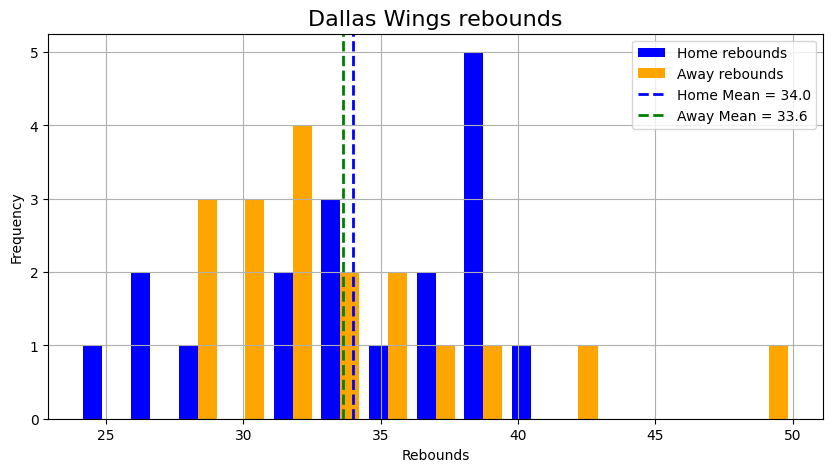

In [9]:
Home_rebounds= wnba_standings_df[(wnba_standings_df['TEAM']=='Dallas Wings')& (wnba_standings_df['LOCATION']=='HOME')].groupby(['GAME_CODE','TEAM','LOCATION'])['TOTAL_REBOUNDS'].sum()
Home_rebounds
Away_rebounds= wnba_standings_df[(wnba_standings_df['TEAM']=='Dallas Wings') & (wnba_standings_df['LOCATION']=='AWAY')].groupby(['GAME_CODE','TEAM','LOCATION'])['TOTAL_REBOUNDS'].sum()
Away_rebounds
# getting to compare home and away rebounds
#dallas_wings_rebounds = pd.concat([Home_rebounds,Away_rebounds], axis=1, keys=['HOME','AWAY'])
#dallas_wings_rebounds

plt.figure(figsize=(10,5))
plt.hist([ Home_rebounds,Away_rebounds], bins= 15,label=['Home rebounds','Away rebounds'], color=['blue','orange'])
plt.axvline(Home_rebounds.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Home Mean = {Home_rebounds.mean():.1f}')
plt.axvline(Away_rebounds.mean(), color='green', linestyle='dashed', linewidth=2, label=f'Away Mean = {Away_rebounds.mean():.1f}')

#Adding a grid to make it easier to  view
plt.grid(True)
plt.title('Dallas Wings rebounds',fontsize= 16)
plt.xlabel('Rebounds')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Dallas Wings rebounds show that at home they had an advantage as compared to when they are away.

---



# 2. **Dallas wings Team ratings**
Calculating the offensive and defensive ratings.
Using the formular below;

Number of Possessions = 0.96*(Number of Field Goal Att + Turnovers + 0.44*Free-Throw Att – Off Rebounds))

In [11]:
#Estimating the number of possesion per game
wnba_standings_df['EST_Poss']= 0.96*(wnba_standings_df['FIELD_GOALS_ATT']+wnba_standings_df["TURNOVERS"]+ 0.44*wnba_standings_df["FREE_THROWS_ATT"]-wnba_standings_df["OFFENSIVE_REBOUNDS"])
#Estimating ratings per game
wnba_standings_df['Eff_Rating'] =100 * (wnba_standings_df['POINTS']/ wnba_standings_df['EST_Poss'])

#look at the output
wnba_standings_df.loc[wnba_standings_df['TEAM']=='Dallas Wings', ['TEAM_ID', 'EST_Poss', 'Eff_Rating']]



,TEAM_ID,EST_Poss,Eff_Rating
40,155,74.9184,90.765419
49,155,84.3648,69.934380
56,155,73.4976,115.650035
60,155,72.9600,115.131579
69,155,73.7664,92.182891
71,155,74.6880,108.451157
83,155,83.5200,106.561303
96,155,75.6864,107.020548
101,155,81.8304,87.986861
106,155,76.1088,89.345779


Calculating offensive ratings home and away for Dallas Wings


In [12]:
#Calculating the overall offensive ratings
Dallas_data = wnba_standings_df[wnba_standings_df['TEAM']=='Dallas Wings']
overall_offensive_ratings = Dallas_data['Eff_Rating'].mean()
print('Overall offensive rating ',overall_offensive_ratings)

#calculating the mean Home offensive rating
home_off_ratings = wnba_standings_df[(wnba_standings_df['TEAM']=='Dallas Wings')& (wnba_standings_df['LOCATION']=='HOME')]["Eff_Rating"].mean()
print('Home offensive rating ', home_off_ratings)

#calculating the mean Away offensive rating
away_off_ratings = wnba_standings_df[(wnba_standings_df['TEAM']=='Dallas Wings')& (wnba_standings_df['LOCATION']=='AWAY')]["Eff_Rating"].mean()
print('Away offensive rating ',away_off_ratings)

Overall offensive rating  107.5251054867711
Home offensive rating  106.3969447683812
Away offensive rating  108.653266205161


Caalculating the defensive ratings



In [13]:
teams = (
    wnba_standings_df[["TEAM", "TEAM_ID"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

print(teams)

                  TEAM  TEAM_ID
0        Seattle Storm      161
1      Connecticut Sun      157
2        Indiana Fever      158
3     New York Liberty      150
4          Chicago Sky     5691
5       Minnesota Lynx      156
6   Washington Mystics      154
7      Phoenix Mercury      151
8   Los Angeles Sparks      149
9        Atlanta Dream     8406
10      Las Vegas Aces      153
11        Dallas Wings      155


In [15]:
# 1. Compute opponent ID (vectorized)
wnba_standings_df["__opp_id"] = np.where(
    wnba_standings_df["TEAM_ID"] == wnba_standings_df["HOME_TEAM_ID"], wnba_standings_df["AWAY_TEAM_ID"],wnba_standings_df["HOME_TEAM_ID"]
)

# 2. Merge with existing teams DataFrame, but only bring in the name
wnba_standings_df = wnba_standings_df.merge(
    teams.rename(columns={"TEAM_ID": "__opp_id", "TEAM": "OPP_TEAM"}),
    on="__opp_id",
    how="left"
)

# 3. Drop the temporary ID
wnba_standings_df =wnba_standings_df.drop(columns="__opp_id")

wnba_standings_df[["TEAM", "TEAM_ID", "OPP_TEAM"]]

,TEAM,TEAM_ID,OPP_TEAM
0,Seattle Storm,161,Connecticut Sun
1,Connecticut Sun,157,Seattle Storm
2,Indiana Fever,158,Chicago Sky
3,New York Liberty,150,Minnesota Lynx
4,Seattle Storm,161,New York Liberty
...,...,...,...
427,Los Angeles Sparks,149,Las Vegas Aces
428,Dallas Wings,155,Chicago Sky
429,Atlanta Dream,8406,Dallas Wings
430,Las Vegas Aces,153,Atlanta Dream


In [17]:
# Create unique teams lookup
teams = (
    wnba_standings_df[["TEAM", "TEAM_ID"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Add opponent ID (based on game logic)
wnba_standings_df["__opp_id"] = np.where(
    wnba_standings_df["TEAM_ID"] == wnba_standings_df["HOME_TEAM_ID"],
    wnba_standings_df["AWAY_TEAM_ID"],
    wnba_standings_df["HOME_TEAM_ID"]
)


# Merge to bring opponent team names
wnba_standings_df = wnba_standings_df.merge(
    teams[["TEAM_ID", "TEAM"]].rename(columns={"TEAM_ID": "__opp_id", "TEAM": "OPP_TEAM"}),
    on="__opp_id",
    how="left"
)


# Drop the helper column
wnba_standings_df = wnba_standings_df.drop(columns="__opp_id")

# Check output
wnba_standings_df[["TEAM", "TEAM_ID", "OPP_TEAM"]]


,TEAM,TEAM_ID,OPP_TEAM
0,Seattle Storm,161,Connecticut Sun
1,Connecticut Sun,157,Seattle Storm
2,Indiana Fever,158,Chicago Sky
3,New York Liberty,150,Minnesota Lynx
4,Seattle Storm,161,New York Liberty
...,...,...,...
427,Los Angeles Sparks,149,Las Vegas Aces
428,Dallas Wings,155,Chicago Sky
429,Atlanta Dream,8406,Dallas Wings
430,Las Vegas Aces,153,Atlanta Dream


Defensive ratings

In [18]:
#calculating the overall defensive ratings
overall_defensive_ratings = wnba_standings_df[wnba_standings_df['OPP_TEAM']=='Dallas Wings']['Eff_Rating'].mean()
#calculating the overall home defensive ratings
overall_home_defensive_ratings = wnba_standings_df[(wnba_standings_df['OPP_TEAM']=='Dallas Wings')& (wnba_standings_df['LOCATION']=='HOME')]['Eff_Rating'].mean()

#calulating the overall away defensive ratings
overall_away_defensive_ratings = wnba_standings_df[(wnba_standings_df['OPP_TEAM']=='Dallas Wings')& (wnba_standings_df['LOCATION']=="AWAY")]['Eff_Rating'].mean()

print('Overall defensive ratings',overall_defensive_ratings)
print('Overall home defensive ratings',overall_home_defensive_ratings)
print('Overall away defensive ratings',overall_away_defensive_ratings)

Overall defensive ratings 107.73267529857054
Overall home defensive ratings 107.86753409583295
Overall away defensive ratings 107.59781650130815


Chart to show differece between offensive and defensive ratings

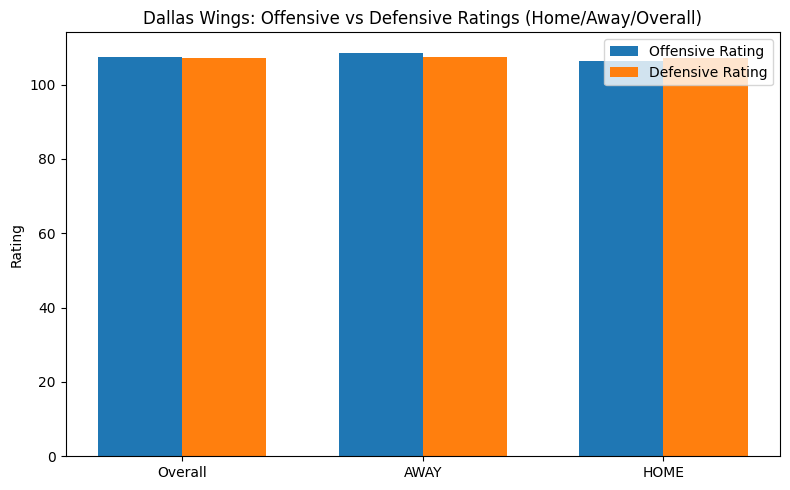

In [19]:
# 1. Compute opponent points
wnba_standings_df["OPP_POINTS"] = np.where(
   wnba_standings_df["TEAM_ID"] == wnba_standings_df["HOME_TEAM_ID"],
  wnba_standings_df["AWAY_SCORE"],
   wnba_standings_df["HOME_SCORE"]
)

# 2. Compute defensive rating
wnba_standings_df["Def_Rating"] = 100 * (wnba_standings_df["OPP_POINTS"] / wnba_standings_df["EST_Poss"])

# 3. Filter for Dallas Wings
dallas = wnba_standings_df[wnba_standings_df["TEAM"] == "Dallas Wings"]

# 4. Compute group means
grouped = dallas.groupby("LOCATION")[["Eff_Rating", "Def_Rating"]].mean().reset_index()

# (Optional) compute overall mean
overall = dallas[["Eff_Rating", "Def_Rating"]].mean().to_frame().T
overall["LOCATION"] = "Overall"

plot_df = pd.concat([overall, grouped], ignore_index=True)



x = np.arange(len(plot_df))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, plot_df["Eff_Rating"], width, label="Offensive Rating")
plt.bar(x + width/2, plot_df["Def_Rating"], width, label="Defensive Rating")

plt.xticks(x, plot_df["LOCATION"])
plt.ylabel("Rating")
plt.title("Dallas Wings: Offensive vs Defensive Ratings (Home/Away/Overall)")
plt.legend()
plt.tight_layout()
plt.show()


Downlaoding the data.



In [20]:
!wget -O wnba_pbp_data_2022.csv https://www.dropbox.com/scl/fi/o4ac4t31cb8ixi1yn3ok3/wnba_pbp_data_2022.csv?rlkey=geuh1cqghdvrgnfcxldhi5y64&dl=0
!wget -O wnba_player_game_data.csv https://www.dropbox.com/scl/fi/41bdhhtujgx0yz1lls9w1/wnba_player_game_data.csv?rlkey=e7i0mrqwcz6s2mw6qhd80nycq&dl=0


--2025-09-30 01:13:46--  https://www.dropbox.com/scl/fi/o4ac4t31cb8ixi1yn3ok3/wnba_pbp_data_2022.csv?rlkey=geuh1cqghdvrgnfcxldhi5y64
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6033:18::a27d:5312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e94039e90402ca0c70a463e15.dl.dropboxusercontent.com/cd/0/inline/CyTcliJQe2IHGvf7wh0pL0O9-ZQyIJ76CtZBO8GjR4D4sb9BMKjxDnZA1k6GNrwet7nAdcRsYLMJh2YHup9S8Vd3GINbd_uthRBINiw3tFxtuK6ZyOkcogawyuEVmwKp0Tk/file# [following]
--2025-09-30 01:13:46--  https://uc8e94039e90402ca0c70a463e15.dl.dropboxusercontent.com/cd/0/inline/CyTcliJQe2IHGvf7wh0pL0O9-ZQyIJ76CtZBO8GjR4D4sb9BMKjxDnZA1k6GNrwet7nAdcRsYLMJh2YHup9S8Vd3GINbd_uthRBINiw3tFxtuK6ZyOkcogawyuEVmwKp0Tk/file
Resolving uc8e94039e90402ca0c70a463e15.dl.dropboxusercontent.com (uc8e94039e90402ca0c70a463e15.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6033:15::a27d:530f
Connectin

Loading in data files.


Creating a dataframe called "shotDf" that filters non n/a values of x-shots
Calculate the Euclidean distances from the origin (0,0) for each shot in shotDF using the X and Y shot coordinates using np.linalg.norm. Save that as l2_distances

create a new column in shotDF named 'L2_distance' and assign the l2_distances values you created previously.

Create 2 new dataframes named "shotDF_made" and "shotDF_missed". shotDF_made containing only the records for successful field goals ('Field Goal Made'), and shotDF_missed for unsuccessful field goals ('Field Goal Missed')





In [21]:
# @title
# Load in the data files and do some more pre-processing
inputDF = pd.read_csv('./wnba_pbp_data_2022.csv')
player_info_df = pd.read_csv('./wnba_player_game_data.csv')

# get the shot distance and create the shot dataframe.
# get the shotDF - need the distance not to have a nan
shotDF = inputDF[inputDF['X_SHOT_COORDINATE'].notna()].copy()
l2_distances = np.linalg.norm(shotDF[['X_SHOT_COORDINATE', 'Y_SHOT_COORDINATE']].values, axis=1)

# Add the calculated distances to the DataFrame
shotDF['L2_distance'] = l2_distances

# get the shots made and missed based on distance
shotDF_made = shotDF[shotDF['EVENT_DESC'] == 'Field Goal Made']
shotDF_missed = shotDF[shotDF['EVENT_DESC'] == 'Field Goal Missed']

# get the shots made and missed for dallas wings team
shotDF_made_dallas = shotDF_made[shotDF_made['OFF_TEAM_ID'] == 155]
shotDF_missed_dallas = shotDF_missed[shotDF_missed['OFF_TEAM_ID'] == 155]


In [24]:
inputDF.columns

Index(['GAME_CODE', 'SEASON', 'EVENT', 'EVENT_DESC', 'EVENT_DETAIL',
       'DETAIL_DESC', 'SEQ', 'POINTS', 'OFF_TEAM_ID', 'OFFENSIVE_PLAYER',
       'OFFENSIVE_PLAYER2', 'DEFENSIVE_PLAYER', 'PERIOD', 'TIME_REMAINING',
       'SCORE_AFTER', 'SCORE_DEF_TEAM', 'DISTANCE', 'X_SHOT_COORDINATE',
       'Y_SHOT_COORDINATE', 'FASTBREAK', 'IN_PAINT', 'SECOND_CHANCE',
       'OFF_TURNOVER'],
      dtype='object')

In [25]:
# @title
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plot the court

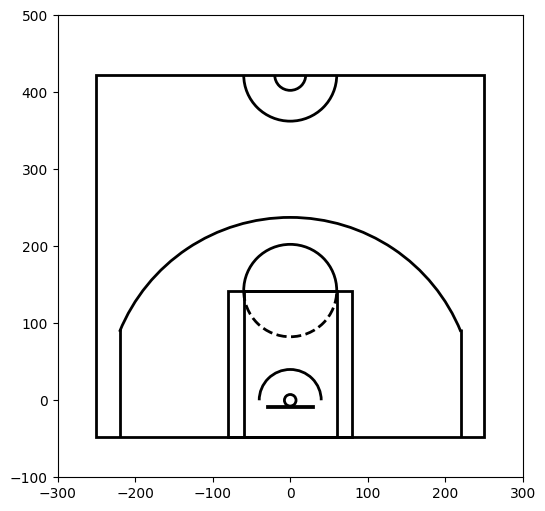

In [26]:
# @title
# This is how we can plot the court
plt.figure(figsize=(6,6))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Plot all the Dallas wings shots in the season

Multiply the X_SHOT_COORDINATE and Y_SHOT_COORDINATE by 10 to get more granularity

Draw the court

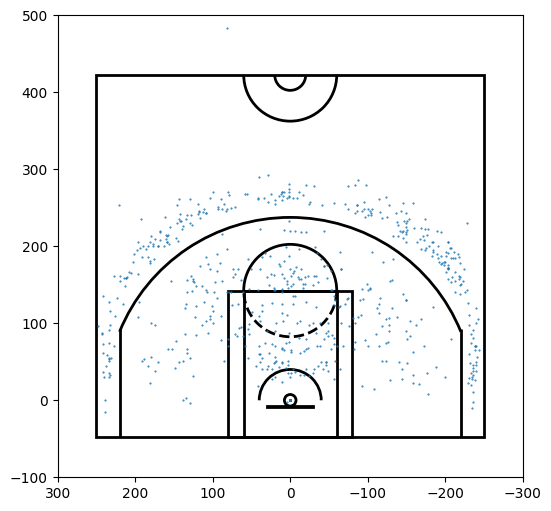

In [27]:


#ploting  all the shots in the season - we multiply by 10 to get more granularity
#plot the locations of all the shot

plt.figure(figsize=(6,6))
plt.plot(shotDF_made_dallas['X_SHOT_COORDINATE']*10,shotDF_made_dallas['Y_SHOT_COORDINATE']*10,'.', markersize=1)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

Plotting the shots made by the Dallas Wings team.

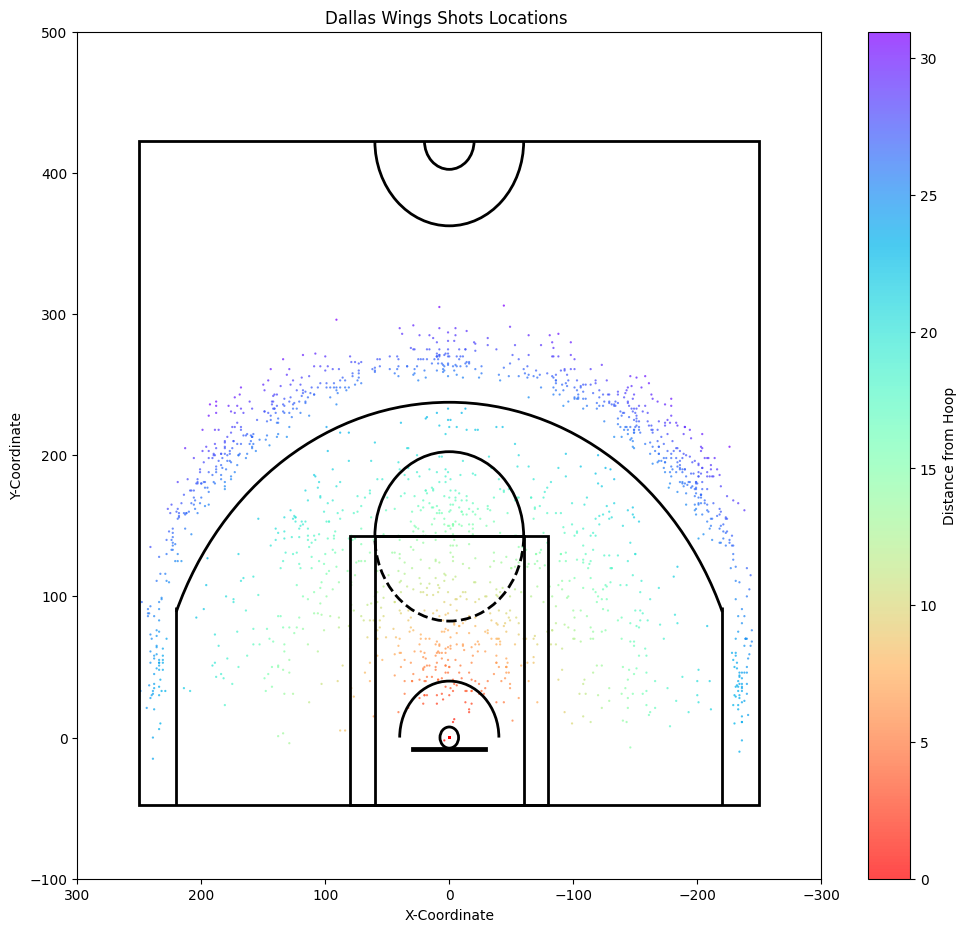

In [28]:
# @title
# get the shots made and missed based on distance
#shotDF_made = shotDF[shotDF['EVENT_DESC'] == 'Field Goal Made']
#shotDF_missed = shotDF[shotDF['EVENT_DESC'] == 'Field Goal Missed']

# get the shots made and missed for dallas wings team
#shotDF_made_dallas = shotDF_made[shotDF_made['OFF_TEAM_ID'] == 155]
#shotDF_missed_dallas = shotDF_missed[shotDF_missed['OFF_TEAM_ID'] == 155]
### Let's plot the locations of all the shot
plt.figure(figsize=(12,11))

updatedShotDF = shotDF[shotDF['L2_distance'] < 31]
updatedShotDF_dallas = updatedShotDF[updatedShotDF['OFF_TEAM_ID'] == 155]

plt.scatter(updatedShotDF_dallas['X_SHOT_COORDINATE']*10, updatedShotDF_dallas['Y_SHOT_COORDINATE']*10, c=updatedShotDF_dallas['L2_distance'], cmap='rainbow_r', s=0.4, alpha=0.71)

# Add a colorbar for the distances
cbar = plt.colorbar()
cbar.set_label('Distance from Hoop')

plt.title("Dallas Wings Shots Locations ")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

Update the shotDF with the home and away Location information, as well as Team information

In [30]:
# let's get the TEAM_ID and the TEAM_NAME sorted
# The error indicates that 'CURR_TEAM_ID' and 'CURR_TEAM' are not in player_info_df columns.
# Let's check the actual column names in player_info_df.
# Based on previous output, the correct column names are 'TEAM_ID' and 'TEAM'.
unique_teams = player_info_df[["TEAM_ID", "TEAM"]].drop_duplicates()

# now add in the TEAM to the shotDF dataframe
shotDF = shotDF.merge(
    unique_teams,
    how="left",
    left_on="OFF_TEAM_ID",
    right_on="TEAM_ID"
)

# change the TEAM to TEAM_NAME
shotDF = shotDF.rename(columns={"TEAM": "TEAM_NAME"})

# Add in Home and Away Location information
# Based on previous output, the HOME_TEAM_ID is in wnba_standings_df.
# We need to merge this information into shotDF based on GAME_CODE.
game_locations = wnba_standings_df[['GAME_CODE', 'HOME_TEAM_ID']].drop_duplicates()

shotDF = shotDF.merge(
    game_locations,
    on='GAME_CODE',
    how='left'
)

shotDF["LOCATION"] = np.where(shotDF["HOME_TEAM_ID"] == shotDF["OFF_TEAM_ID"], "Home", "Away")

# how many Home shots vs Away shots?
display(shotDF["LOCATION"].value_counts())
display(shotDF.head())

,count
LOCATION,
Away,17945
Home,14686


,GAME_CODE,SEASON,EVENT,EVENT_DESC,EVENT_DETAIL,DETAIL_DESC,SEQ,POINTS,OFF_TEAM_ID,OFFENSIVE_PLAYER,...,Y_SHOT_COORDINATE,FASTBREAK,IN_PAINT,SECOND_CHANCE,OFF_TURNOVER,L2_distance,TEAM_ID,TEAM_NAME,HOME_TEAM_ID,LOCATION
0,2429380,2022,3,Field Goal Made,40.0,Layup Shot,6,2.0,153,850200.0,...,0.0,N,Y,N,Y,0.000000,153,Las Vegas Aces,151.0,Away
1,2429380,2022,3,Field Goal Made,45.0,Jump Shot,14,3.0,151,336713.0,...,24.8,N,N,N,N,27.170756,151,Phoenix Mercury,151.0,Home
2,2429380,2022,4,Field Goal Missed,45.0,Jump Shot,18,3.0,151,408362.0,...,24.3,N,N,N,N,26.392802,151,Phoenix Mercury,151.0,Home
3,2429380,2022,3,Field Goal Made,45.0,Jump Shot,20,2.0,153,923865.0,...,6.0,N,N,N,N,18.973666,153,Las Vegas Aces,151.0,Away
4,2429380,2022,4,Field Goal Missed,45.0,Jump Shot,24,3.0,151,520283.0,...,16.0,N,N,N,Y,26.640008,151,Phoenix Mercury,151.0,Home


Make this into an interactive plot using home/away and team information with a check-box for Gaussian smoothing

In [31]:
from scipy.ndimage import gaussian_filter
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact



# --- Build the team list ---
team_list = np.unique(shotDF['OFF_TEAM_ID'].to_list())

# --- Define plotting function at the team level ---
def plot_team_made_missed_map(team_select, shotDF, location="All", smoothing=False):
    # filter shots for this team
    teamShotDF = shotDF[shotDF['OFF_TEAM_ID'] == team_select]

    # Optional: filter by Home/Away
    if location == "Home":
        teamShotDF = teamShotDF[teamShotDF["LOCATION"] == "Home"]
    elif location == "Away":
        teamShotDF = teamShotDF[teamShotDF["LOCATION"] == "Away"]

    # Split made/missed
    teamShotDF_made = teamShotDF[teamShotDF['EVENT_DESC'] == 'Field Goal Made']
    teamShotDF_missed = teamShotDF[teamShotDF['EVENT_DESC'] == 'Field Goal Missed']

    # Histogram bins
    x_edges_input = np.linspace(-260,260,52 )
    y_edges_input = np.linspace(-40, 800, 85)
    cmap = plt.cm.viridis

    hist_data_made, xedges_made, yedges_made = np.histogram2d(
        teamShotDF_made['X_SHOT_COORDINATE'] * 10,
        teamShotDF_made['Y_SHOT_COORDINATE'] * 10,
        bins=[x_edges_input, y_edges_input]
    )

    hist_data_all, xedges_all, yedges_all = np.histogram2d(
        teamShotDF['X_SHOT_COORDINATE'] * 10,
        teamShotDF['Y_SHOT_COORDINATE'] * 10,
        bins=[x_edges_input, y_edges_input]
    )

    # Ratio (made / all)
    norm_all = np.divide(hist_data_made, hist_data_all)
    norm_all_without_nan = np.nan_to_num(norm_all, nan=0.0, posinf=0.0, neginf=0.0)

    # Apply Gaussian smoothing if checked
    if smoothing:
        norm_all_without_nan = gaussian_filter(norm_all_without_nan, sigma=1.5)

    # Plot
    plt.figure(figsize=(6,5))
    draw_court(outer_lines=True)

    plt.imshow(
        norm_all_without_nan.T,
        extent=[xedges_all[0], xedges_all[-1], yedges_all[0], yedges_all[-1]],
        origin='lower', cmap=cmap, vmin=0, vmax=0.6
    )

    plt.colorbar(label='Ratio (Made / Total)')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Dallas Wings - 2D Shot Efficiency Map')
    plt.xlim(250,-250)
    plt.ylim(0,300)
    plt.show()


@interact(
    location=["All", "Home", "Away"],
    smoothing=False
)
def g(location, smoothing):
    dallas_id = 155  # Dallas Wings TEAM_ID




    plot_team_made_missed_map(dallas_id, shotDF, location, smoothing)






interactive(children=(Dropdown(description='location', options=('All', 'Home', 'Away'), value='All'), Checkbox…

Overall MAE: 0.34, RMSE: 0.27
             Actual  Predicted       MAE      RMSE
Location                                          
Away      82.538462   82.58329  0.357304  0.375945
Home      84.333333   84.13602  0.320390  0.123445


/tmp/ipython-input-3948887301.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = results.groupby("Location").apply(


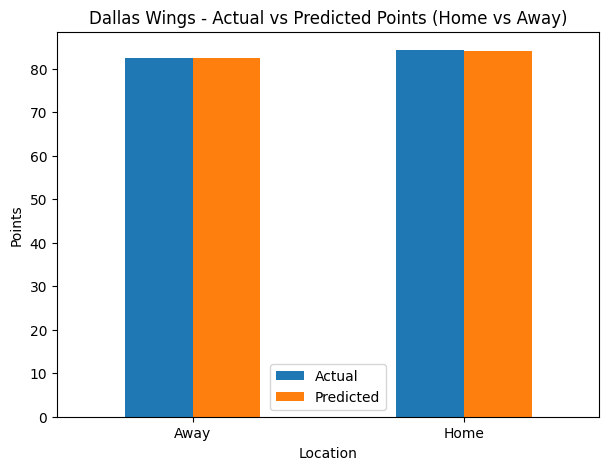

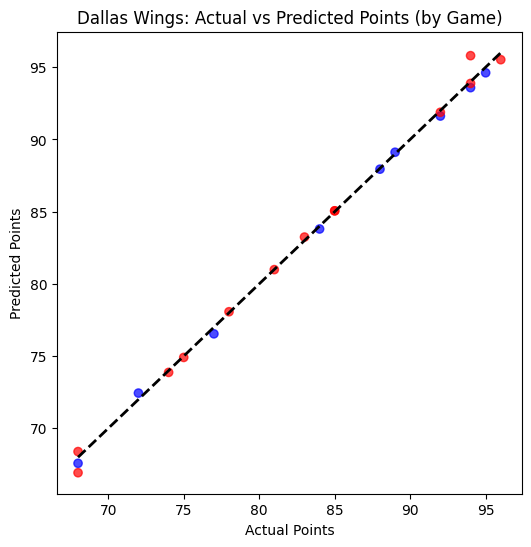

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Filter Dallas Wings games ---
dallas_df = wnba_standings_df[wnba_standings_df["TEAM"] == "Dallas Wings"].copy()

# Merge Def_Rating and OPP_POINTS from wnba_standings_df
dallas_df = dallas_df.merge(
    wnba_standings_df[['GAME_CODE', 'Def_Rating', 'OPP_POINTS']],
    on='GAME_CODE',
    how='left',
    suffixes=('', '_y') # Add suffixes to avoid column name conflicts if they exist
)
# Drop duplicated columns if any after merge
dallas_df = dallas_df.loc[:,~dallas_df.columns.duplicated()]


# Target = POINTS
y = dallas_df['POINTS']

# Features: select reasonable numeric predictors available before the game
feature_cols = [
    "FIELD_GOALS_ATT",   # FGA
    "THREE_POINT_ATT",   # FG3A
    "FREE_THROWS_ATT",   # FTA
    "TURNOVERS",         # TOV
    "OFFENSIVE_REBOUNDS",# OREB
    "DEFENSIVE_REBOUNDS",# DREB
    "ASSISTS",           # AST
    "EST_Poss",          # PACE proxy
    "Eff_Rating",        # OFF_RATING
    "Def_Rating"         # you will need to calculate this
]
X = dallas_df[feature_cols].fillna(0)

# Add location as dummy variable (HOME=1, AWAY=0)
X["HOME"] = np.where(dallas_df["HOME_TEAM_ID"] == dallas_df["TEAM_ID"], 1, 0)

# --- 2. Train/Test Split (time-agnostic for simplicity here) ---
X_train, X_test, y_train, y_test, loc_train, loc_test = train_test_split(
    X, y, X["HOME"], test_size=0.3, random_state=42
)

# --- 3. Fit Ridge Regression ---
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# --- 4. Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Overall MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Put results in a dataframe
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Location": np.where(loc_test==1, "Home", "Away")
})

# --- 5. Group by Home/Away ---
summary = results.groupby("Location").apply(
    lambda g: pd.Series({
        "Actual": g["Actual"].mean(),
        "Predicted": g["Predicted"].mean(),
        "MAE": mean_absolute_error(g["Actual"], g["Predicted"]),
        "RMSE": mean_squared_error(g["Actual"], g["Predicted"])
    })
)
print(summary)


# --- 6. Plot grouped bar (Actual vs Predicted) ---
summary_plot = summary[["Actual","Predicted"]].reset_index()

summary_plot.plot(
    x="Location", kind="bar", figsize=(7,5),
    title="Dallas Wings - Actual vs Predicted Points (Home vs Away)"
)
plt.ylabel("Points")
plt.xticks(rotation=0)
plt.show()

# --- 7. Scatter Plot (per game) ---
plt.figure(figsize=(6,6))
colors = results["Location"].map({"Home": "blue", "Away": "red"})
plt.scatter(results["Actual"], results["Predicted"], c=colors, alpha=0.7)
plt.plot([results["Actual"].min(), results["Actual"].max()],
         [results["Actual"].min(), results["Actual"].max()],
         "k--", lw=2)  # 45-degree line
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Dallas Wings: Actual vs Predicted Points (by Game)")
plt.show()